Kelompok 10 - PCD A  
- Rionando Soksein Putra - 11221063
- Fanky Wellsy Pongoh - 11221021
- Samuel Benedicto Siahaan - 11221064

In [ ]:
!curl -L -o brain-tumor-mri-dataset.zip\
  https://www.kaggle.com/api/v1/datasets/download/masoudnickparvar/brain-tumor-mri-dataset

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  148M  100  148M    0     0   122M      0  0:00:01  0:00:01 --:--:--  244M


In [ ]:
!unzip brain-tumor-mri-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Training/glioma/Tr-gl_0712.jpg  
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training/glioma/

# 1. Pendahuluan & Problem Statement

**Brain Tumor MRI Dataset**  

adalah sebuah dataset yang berisi kumpulan gambar MRI (Magnetic Resonance Imaging) dari otak manusia yang mencakup berbagai kasus tumor otak. Dataset ini biasanya mencakup gambar-gambar yang menunjukkan berbagai jenis tumor otak, serta metadata yang terkait dengan setiap gambar, seperti diagnosis, ukuran tumor, lokasi tumor, dan informasi klinis lainnya.


Alasan pemilihan dataset ini adalah karena dataset Brain Tumor MRI menyediakan data yang sangat relevan dan spesifik untuk penelitian dan pengembangan algoritma dalam bidang pengolahan citra medis, khususnya untuk deteksi dan klasifikasi tumor otak. Dengan menggunakan dataset ini, kelompok kami dapat mengembangkan dan menguji model machine learning atau deep learning yang dapat membantu dalam diagnosis dini dan akurasi deteksi tumor otak, yang pada akhirnya dapat meningkatkan hasil pengobatan dan perawatan pasien. Selain itu, dataset ini juga memungkinkan untuk eksplorasi berbagai teknik pengolahan citra digital, seperti segmentasi, ekstraksi fitur, dan analisis pola, yang semuanya sangat penting dalam bidang medis.  

# 2. Preprocessing Pipeline

In [ ]:
# import library yang akan digunakan
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

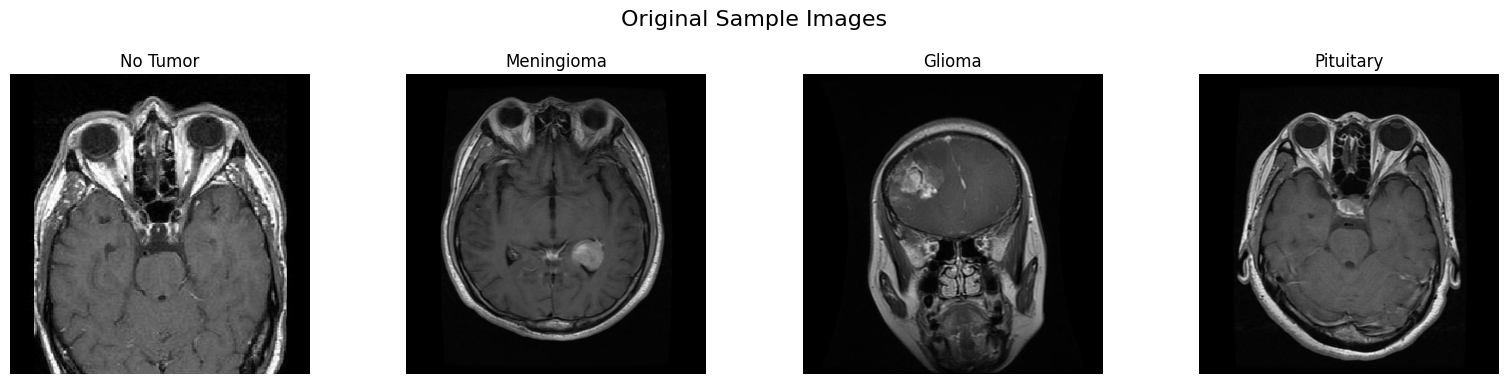

In [ ]:
glioma_img = 'Training/glioma/Tr-glTr_0000.jpg'
meningioma_img = 'Training/meningioma/Tr-meTr_0001.jpg'
notumor_img = 'Training/notumor/Tr-noTr_0000.jpg'
pituitary_img = 'Training/pituitary/Tr-piTr_0000.jpg'

plt.figure(figsize=(16, 4))

plt.subplot(1, 4, 1)
plt.imshow(cv.imread(notumor_img), cmap='gray')
plt.title('No Tumor')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(cv.imread(meningioma_img), cmap='gray')
plt.title('Meningioma')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(cv.imread(glioma_img), cmap='gray')
plt.title('Glioma')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(cv.imread(pituitary_img), cmap='gray')
plt.title('Pituitary')
plt.axis('off')

plt.suptitle('Original Sample Images', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Preprocess

In [ ]:
def brighten_filter(image, beta=50):
    """
    Menerapkan filter terang pada citra.

    Args:
        image: Citra input (NumPy array).
        beta: Nilai penambahan intensitas (integer).

    Returns:
        Citra yang sudah diberi filter terang.
    """
    # Pastikan nilai beta berada dalam rentang yang valid [0, 255]
    beta = max(0, min(beta, 255))

    # Tambahkan nilai beta ke setiap piksel
    brightened_image = cv.add(image, beta)

    return brightened_image


"""
Utility function untuk mengubah gambar bgr ke grayscale
"""
def bgr_to_graysacle(path):
  img = cv.imread(path)
  img = cv.resize(img, (350, 350))
  B, G, R = img[:, :, 0], img[:, :, 1], img[:, :, 2]

  # Ubah menjadi grayscale dengan rumus luminance
  gray_image = 0.2126 * R + 0.7152 * G + 0.0722 * B

  return gray_image

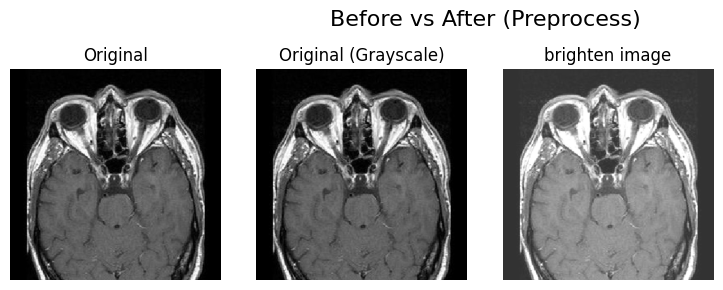

In [ ]:
brighten_img = brighten_filter(cv.imread(notumor_img), beta=50)

plt.figure(figsize=(10, 3))

plt.subplot(1, 4, 1)
plt.imshow(cv.imread(notumor_img), cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(bgr_to_graysacle(notumor_img), cmap='gray')
plt.title('Original (Grayscale)')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(brighten_img, cmap='gray')
plt.title('brighten image')
plt.axis('off')

plt.suptitle('Before vs After (Preprocess)', fontsize=16, x=0.5)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Bisa dilhat berdasarkan hasil preprocess di atas, saat citra diterangkan, tidak ada dampak signifikan, mungkin malah terjadi pengurangan nilai intensitas pixel putih ke pixel sisanya. Sehingga, seharusnya tidak perlu memasukkan filter brighten ke dalam preprocessing pipeline

##  Implementasi Noise

In [ ]:
"""
Utility function untuk menambahkan gaussion noise pada gambar
"""
def add_gaussian_noise(path, mean=0, var=0.04):
    image = cv.imread(path, cv.IMREAD_COLOR_RGB)

    # Ambil ukuran dimensi gambar (baris, kolom, dan channel warna)
    row, col, ch = image.shape

    # Hitung simpangan baku dari varian (sigma = akar dari varian)
    sigma = var ** 0.5

    # Buat noise Gaussian dengan distribusi normal (mean, sigma)
    gauss = np.random.normal(mean, sigma, (row, col, ch))

    # Tambahkan noise ke gambar asli
    noisy = image + gauss

    # Batasi nilai piksel hasil antara 0 dan 255, lalu ubah ke uint8
    return np.clip(noisy, 0, 255).astype(np.uint8)

"""
Utility function untuk menambahkan salt & pepper noise pada gambar
"""
def add_salt_and_pepper_noise(path, salt_vs_pepper=0.05, amount=0.02):
    image = cv.imread(path)
    # Ambil ukuran gambar: baris, kolom, dan channel warna
    row, col, ch = image.shape

    # Salin gambar asli agar tidak merusak data asli
    noisy = np.copy(image)

    # Hitung jumlah pixel yang akan diubah menjadi "salt"
    num_salt = np.ceil(amount * image.size * salt_vs_pepper)

    # Tentukan koordinat acak untuk noise salt pada setiap dimensi gambar
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]

    # Set pixel di koordinat tersebut menjadi 255 putih
    noisy[coords[0], coords[1], :] = 255

    # Hitung jumlah pixel yang akan diubah menjadi "pepper"
    num_pepper = np.ceil(amount * image.size * (1.0 - salt_vs_pepper))

    # Tentukan koordinat acak untuk noise pepper
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]

    # Set pixel di koordinat tersebut menjadi 0 (hitam)
    noisy[coords[0], coords[1], :] = 0

    # Kembalikan gambar yang sudah diberi noise salt and pepper
    return noisy

"""
Utility function untuk menambahkan possion noise pada gambar
"""
def add_poisson_noise(path):
    image = cv.imread(path)

    vals = len(np.unique(image))

    # Cari nilai power of two yang paling dekat
    vals = 2 ** np.ceil(np.log2(vals))

    # Terapkan noise Poisson pada gambar dengan mengalikan dulu gambar dengan 'vals'
    noisy = np.random.poisson(image * vals) / float(vals)

    # Batasi nilai hasil ke rentang [0, 255] dan ubah ke tipe uint8
    return np.clip(noisy, 0, 255).astype(np.uint8)

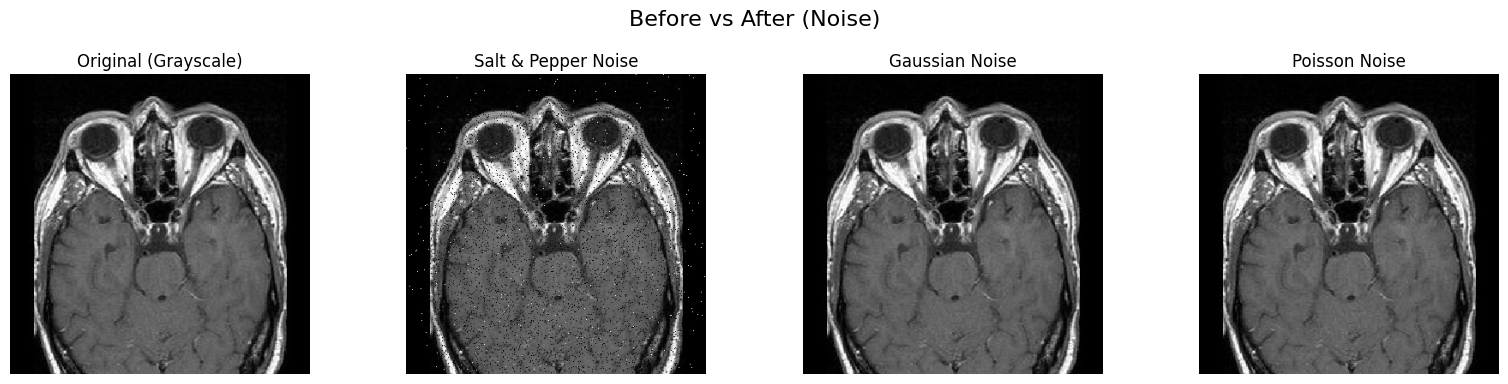

In [ ]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 4, 1)
plt.imshow(bgr_to_graysacle(notumor_img), cmap='gray')
plt.title('Original (Grayscale)')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(add_salt_and_pepper_noise(notumor_img))
plt.title('Salt & Pepper Noise')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(add_gaussian_noise(notumor_img))
plt.title('Gaussian Noise')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(add_poisson_noise(notumor_img))
plt.title('Poisson Noise')
plt.axis('off')

plt.suptitle('Before vs After (Noise)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Dari hasil implemntasi di atas, dapat dilihat bahwa Gaussian dan Poisson tidak memberikan dampak yang terlalu signifikan. Tetapi, Salt & Pepper memberikan dampak yang cukup terlihat. Dampak itu, bisa kita masukkan ke data latih machine learning agar model menjadi lebih robust.

## Implementasi Konvolusi

In [ ]:
"""
utility function untuk melakukan konvolusi ke gambar yang dibeirkan,
tipe konvolusi yang tersedia adalah -> Original, Blur (Mean), Gaussian Blur, Sharpen, Edge Detection (Sobel X), Emboss
"""
def apply_conv(img, conv_type):
  kernels = {
    # Kernel "Original" hanya sebagai placeholder, tidak melakukan perubahan (akan digunakan gambar asli).
    'Original': np.array([[0]]),

    # Kernel "Blur (Mean)" untuk meratakan piksel dengan mengambil rata-rata dari 9 piksel sekitarnya (3x3).
    # Digunakan untuk menghaluskan atau mengurangi noise pada citra.
    'Blur (Mean)': np.ones((3, 3), np.float32) / 9,

    # Kernel "Gaussian Blur" menggunakan distribusi Gaussian untuk blur yang lebih halus dan alami.
    # Dibuat dengan mengalikan kernel Gaussian 1D secara baris dan kolom untuk mendapatkan 2D kernel.
    'Gaussian Blur': cv.getGaussianKernel(3, 0) @ cv.getGaussianKernel(3, 0).T,

    # Kernel "Sharpen" meningkatkan kontras dan menonjolkan tepi objek.
    # Piksel tengah bernilai tinggi (5), piksel sekitarnya negatif (-1), hasilnya tampak lebih tajam.
    'Sharpen': np.array([[0, -1, 0],
                         [-1, 5, -1],
                         [0, -1, 0]]),

    # Kernel "Edge Detection (Sobel X)" mendeteksi tepi secara horizontal (vertikal pada gambar).
    # Nilai negatif di kiri dan positif di kanan akan memperlihatkan perbedaan intensitas horizontal.
    'Edge Detection (Sobel X)': np.array([[-1, 0, 1],
                                          [-2, 0, 2],
                                          [-1, 0, 1]]),

    # Kernel "Emboss" memberikan efek timbul atau 3D pada gambar.
    # Menghasilkan bayangan seolah-olah cahaya datang dari arah tertentu.
    'Emboss': np.array([[-2, -1, 0],
                        [-1, 1, 1],
                        [0, 1, 2]])
  }
  if conv_type not in kernels:
        return img

  if conv_type == 'Original':
      return img
  else:
      kernel = kernels[conv_type]

      return cv.filter2D(img, -1, kernel)

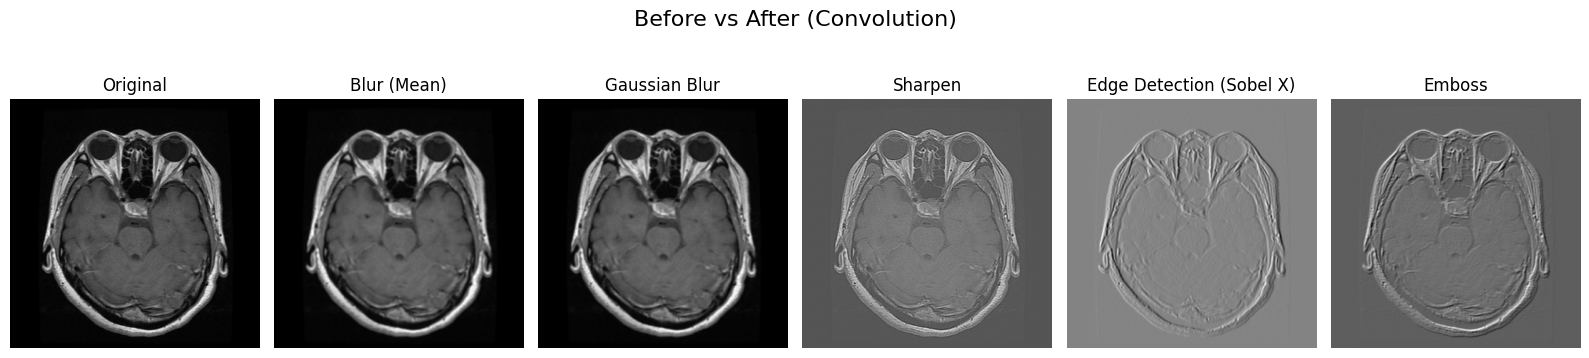

In [ ]:
img = bgr_to_graysacle(pituitary_img) # Ubah disini aja nanti gambar yang mau diliat
blur_img = apply_conv(img, 'Blur (Mean)')
gaussian_img = apply_conv(img, 'Gaussian Blur')
sharpen_img = apply_conv(img, 'Sharpen')
edge_img = apply_conv(img, 'Edge Detection (Sobel X)')
emboss_img = apply_conv(img, 'Emboss')

plt.figure(figsize=(16, 4))

plt.subplot(1, 6, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 6, 2)
plt.imshow(blur_img, cmap='gray')
plt.title('Blur (Mean)')
plt.axis('off')

plt.subplot(1, 6, 3)
plt.imshow(gaussian_img, cmap='gray')
plt.title('Gaussian Blur')
plt.axis('off')

plt.subplot(1, 6, 4)
plt.imshow(sharpen_img, cmap='gray')
plt.title('Sharpen')
plt.axis('off')

plt.subplot(1, 6, 5)
plt.imshow(edge_img, cmap='gray')
plt.title('Edge Detection (Sobel X)')
plt.axis('off')

plt.subplot(1, 6, 6)
plt.imshow(emboss_img, cmap='gray')
plt.title('Emboss')
plt.axis('off')

plt.suptitle('Before vs After (Convolution)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Berdasarkan hasil gambar di atas, dapat dilihat bahwa Hasil convolusi edge detection bisa saja menghilangkan banyak fitur fitur penting. Hal yang sama juga terjadi pada convolusi berupa blur, blur sepertinya akan menghilangkan beberapa bagian penting karena efek dari konvolusi blur tersebut. Hal sebaliknya terjadi pada konvolusi sharpen, konvolusi ini mempertahankan edge tanpa mengurangi detail pixel yang lainnya.

# 3. Image Processing & Transformation

Sehingga, dari hasil analisis yang dilakukan pada bab 2, preprocessing pipeline yang ingin kami coba adalah,
```
Raw Image -> Grayscale -> Sharpen -> Noise (only if image is for training) -> Processed Image
```

In [ ]:
"""
function untuk membuat pipeline yang berfungsi untuk memproses gambar mri.
baca gambar -> Grayscale -> Sharpen -> Noise (only for training image) -> return gambar yang sudah diproses
input params,
conv_type = 'Original', 'Blur (Mean)', 'Gaussian Blur', 'Sharpen', 'Edge Detection (Sobel X)', 'Emboss'
config = {amount -> float, salt_vs_pepper: float}
noise = True, False -> to add noise or not
"""
def image_procesing_pipeline(path, config={}, conv_type='Sharpen', noise=False):
  # apply konvolusi (sharpen untuk defaultnya)
  image = apply_conv(bgr_to_graysacle(path), 'Sharpen')

  # reize agar ukran gambar sama
  image = cv.resize(image, (350, 350))

  # tambah noise
  if noise:
    row, col = image.shape
    amount = config.get('amount', 0.05)
    salt_vs_pepper = config.get('salt_vs_pepper', 0.1)

    # Salin gambar asli agar tidak merusak data asli
    noisy = np.copy(image)

    # Hitung jumlah pixel yang akan diubah menjadi "salt"
    num_salt = np.ceil(amount * image.size * salt_vs_pepper)

    # Tentukan koordinat acak untuk noise salt pada setiap dimensi gambar
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]

    # Set pixel di koordinat tersebut menjadi 255 putih
    noisy[coords[0], coords[1]] = 255

    # Hitung jumlah pixel yang akan diubah menjadi "pepper"
    num_pepper = np.ceil(amount * image.size * (1.0 - salt_vs_pepper))

    # Tentukan koordinat acak untuk noise pepper
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]

    # Set pixel di koordinat tersebut menjadi 0 (hitam)
    noisy[coords[0], coords[1]] = 0

    # Kembalikan gambar yang sudah diberi noise salt and pepper
    image = noisy

  return image

##  Hasil Preprecessing pipeline

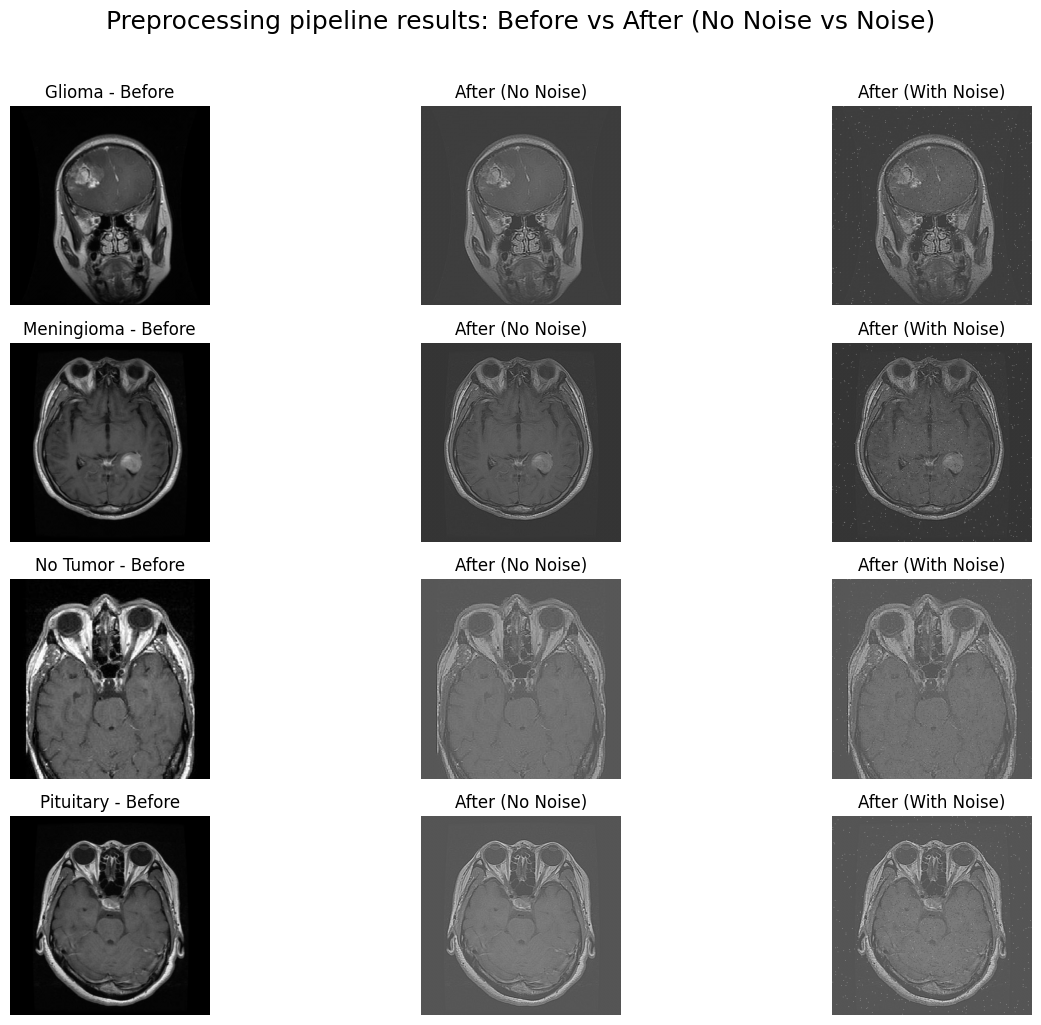

In [ ]:
image_paths = [glioma_img, meningioma_img, notumor_img, pituitary_img]
titles = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']

plt.figure(figsize=(14, 10))

for i, (img_path, title) in enumerate(zip(image_paths, titles)):
    original = cv.imread(img_path)
    original_gray = bgr_to_graysacle(img_path)
    processed_no_noise = image_procesing_pipeline(img_path, noise=False)
    processed_noise = image_procesing_pipeline(img_path, noise=True)

    # CitrA asli
    plt.subplot(4, 3, i * 3 + 1)
    plt.imshow(original_gray, cmap='gray')
    plt.title(f'{title} - Before')
    plt.axis('off')

    # Citra setelah masuk preprocessing pipeline
    plt.subplot(4, 3, i * 3 + 2)
    plt.imshow(processed_no_noise, cmap='gray')
    plt.title('After (No Noise)')
    plt.axis('off')

    plt.subplot(4, 3, i * 3 + 3)
    plt.imshow(processed_noise, cmap='gray')
    plt.title('After (With Noise)')
    plt.axis('off')

plt.suptitle('Preprocessing pipeline results: Before vs After (No Noise vs Noise)', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

# 4. Analisis & Fitur Ekstraksi

In [ ]:
"""
Utility function untuk menampilkan histogram dari gambar yang diberikan
"""
def show_histogram(img, title="Histogram warna gambar"):
    plt.figure(figsize=(6, 4))
    plt.hist(img.flatten(), bins=256, range=[0, 256], color='gray')
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

Mari menggunakan histogram untuk menganalisis hasil preprocess pipeline

In [ ]:
original_img = bgr_to_graysacle(notumor_img)
processed_img = image_procesing_pipeline(notumor_img, noise=True)

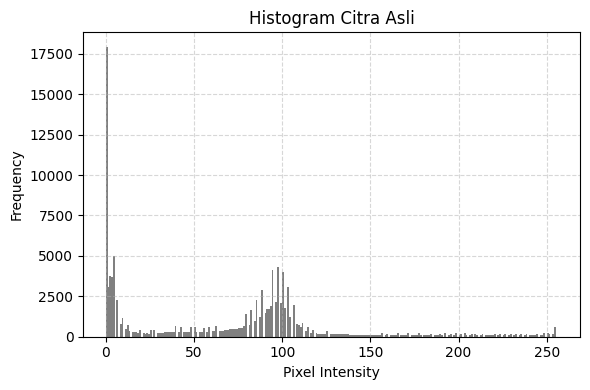

In [ ]:
show_histogram(original_img, "Histogram Citra Asli")

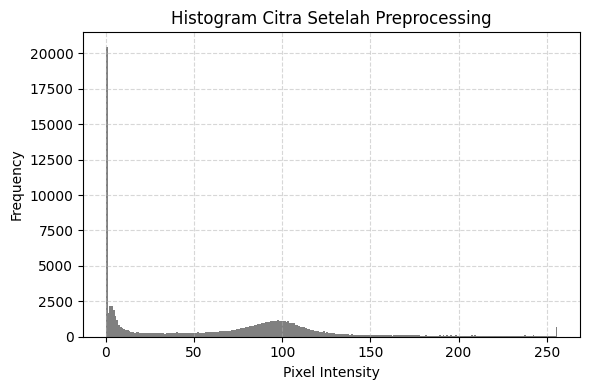

In [ ]:
show_histogram(processed_img, "Histogram Citra Setelah Preprocessing")

Dari hasil visualisasi 2 histogram di atas, dapat dilihat bahwa Histogram citra asli memiliki beberapa puncak tajam yang menunjukkan kurangnya penyebaran kotnras dan ketidakteraturan distribusi dari pixel gambar.  
  
Sedangkan, histogram bawah yang menunjukkan persebaran pixel citra setelah proses preprocessing citra menunjukkan penyebaran yang lebih merata dengan distribusi yang lebih halus dan tidak terlalu terpusat ke beberapa titik.

# 5. Analisis Komparatif

Dari hasil hasil analisis di atas, kita bisa menarik beberapa insight.
  
Filter untuk menerangkan gambar tidak memiliki pengaruh yang terlalu banyak pada citra MRI ini, malahan bisa saja malah memperburuk karena akan mengurangi kontras dari warna putih dan pixel disekitarnya.

Lalu, dari sisi Noise, Salt & Pepper menunjukkan hasil paling terlihat. Gaussian dan Poisson tidak menunjukkan hasil yang terlalu signifikkan pada citra MRI ini.

Lalu, pada hasil konvolusi, Sharpen menunjukkan hasil paling menjanjikan. Hal ini karena konvolusi sharpen mempertajam kontras, yang sangat penting pada citra MRI yang biasanya hanya berupa citra grayscale.

# 6. Kesimpulan

Dari hasil analisis di atas, kami memilih proses pipeline berupa,
```
Raw Image -> Grayscale -> Sharpen -> Noise (only if image is for training) -> Processed Image
```

# 7. Machine Learning (TAMBAHAN)

## Data Preparation

In [ ]:
import os
def load_images_from_folder(folder_path, is_test=False):
    images = []
    labels = []
    classes = sorted(os.listdir(folder_path))
    class_to_idx = {cls_name: idx for idx, cls_name in enumerate(classes)}

    for class_name in classes:
        class_folder = os.path.join(folder_path, class_name)
        if not os.path.isdir(class_folder):
            continue

        for filename in os.listdir(class_folder):
            img_path = os.path.join(class_folder, filename)
            if not filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                continue

            processed_img = None

            if is_test:
              # jangan kasih noise kalo ini data untuk tset
              processed_img = image_procesing_pipeline(img_path, noise=False)
            else:
              processed_img = image_procesing_pipeline(img_path, noise=True)

            images.append(processed_img.flatten())
            labels.append(class_name)

    return np.array(images), np.array(labels)

In [ ]:
train_folder = "Training"
test_folder = "Testing"

# tidak ada konvolusi yang diberikan jika data training
X_train, y_train = load_images_from_folder(train_folder, is_test=False)
X_test, y_test = load_images_from_folder(test_folder, is_test=True)

## Model Training & Saving

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Proses pemilihan model klasifikasi
rfc = RandomForestClassifier()
knn = KNeighborsClassifier()

In [ ]:
rfc.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# evaluasi nilai random forest
rfc.score(X_test, y_test)

0.8924485125858124

In [ ]:
# evaluasi nilai knn
knn.score(X_test, y_test)

0.8344774980930587

In [ ]:
# Simpan model rfc, karena memberikan score terbaik
import pickle

with open('rfc.pkl', 'wb') as f:
    pickle.dump(rfc, f)

# 8. Pengembangan UI (TAMBAHAN)

UI Dapat diakses pada link berikut,  
https://pcd-10.streamlit.app/